In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.style.use('seaborn-v0_8-dark-palette')
plt.style.use('seaborn-v0_8-deep')

# Energy consumption

In [3]:
energy_lv = pd.read_csv("df_energy_consumption_lv.csv")
energy_lt = pd.read_csv("df_energy_consumption_lt.csv")
energy_et = pd.read_csv("df_energy_consumption_et.csv")

In [4]:
# Convert 'Period' column to datetime type
energy_lv['Period'] = pd.to_datetime(energy_lv['Period'])
energy_lt['Period'] = pd.to_datetime(energy_lt['Period'])
energy_et['Period'] = pd.to_datetime(energy_et['Period'])

# Extract year and month information
energy_lv['Year'] = energy_lv['Period'].dt.year
energy_lv['Month'] = energy_lv['Period'].dt.month
energy_lv['Day'] = energy_lv['Period'].dt.day

energy_lt['Year'] = energy_lt['Period'].dt.year
energy_lt['Month'] = energy_lt['Period'].dt.month
energy_lt['Day'] = energy_lt['Period'].dt.day


energy_et['Year'] = energy_et['Period'].dt.year
energy_et['Month'] = energy_et['Period'].dt.month
energy_et['Day'] = energy_et['Period'].dt.day

# Group by year and month and calculate mean energy consumption
mean_lv = energy_lv.groupby(['Year', 'Month'])['Consumption'].mean()
mean_lt = energy_lt.groupby(['Year', 'Month'])['Consumption'].mean()
mean_et = energy_et.groupby(['Year', 'Month'])['Consumption'].mean()

## Energy consumption from 2018 - 2022 for each country

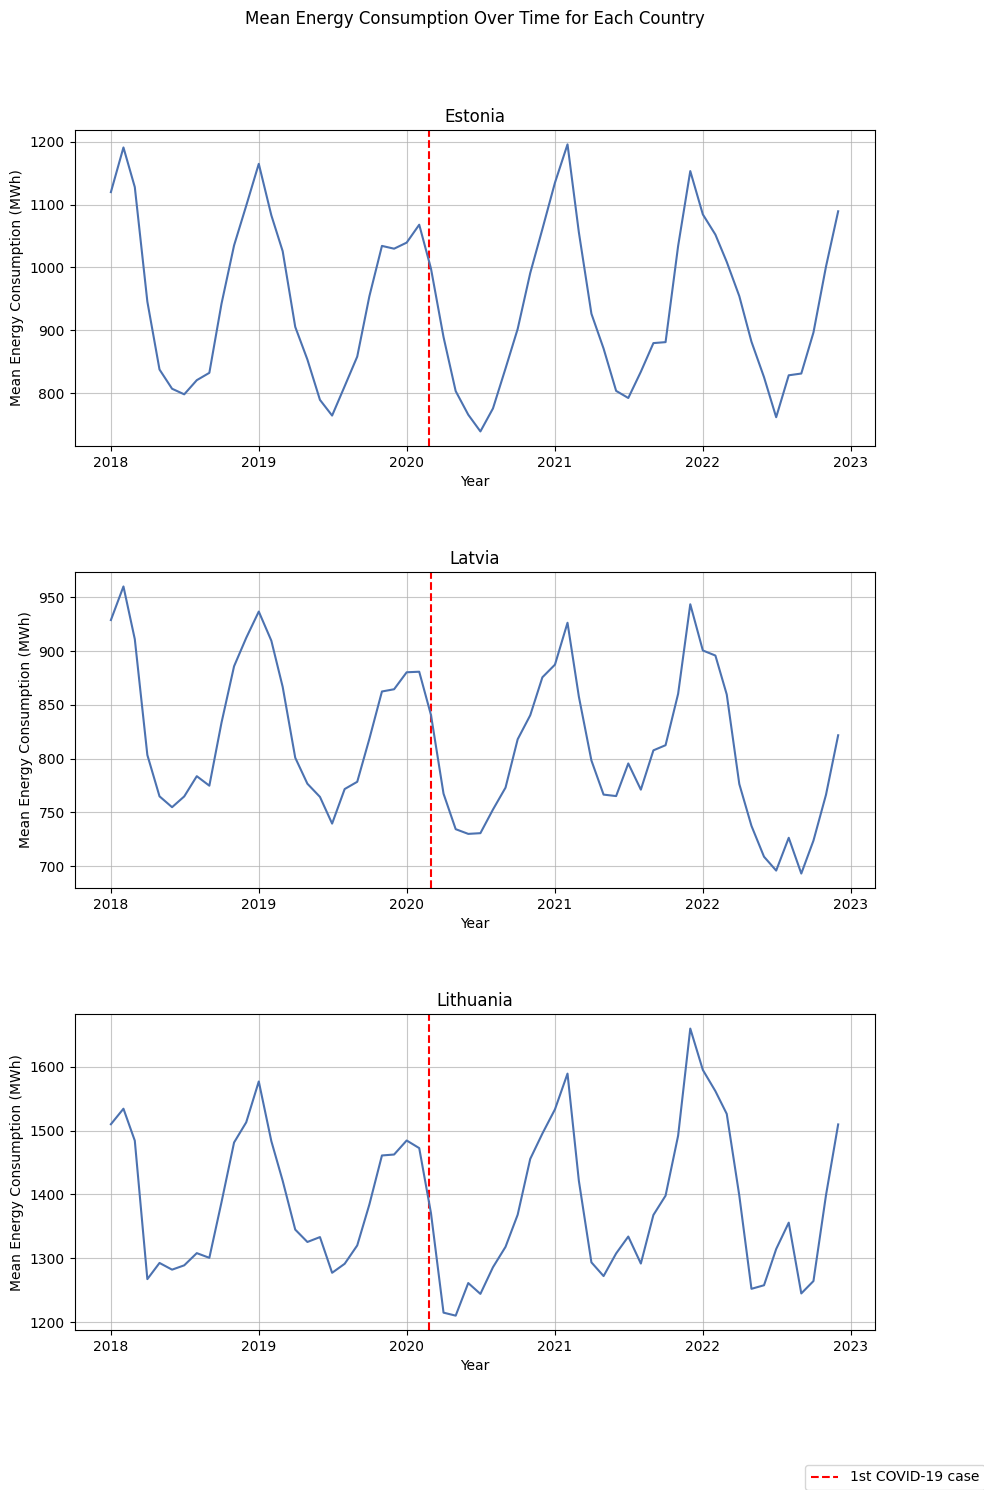

In [5]:
# Resetting the index to flatten the multi-index
mean_lv_flat = mean_lv.reset_index()
mean_lt_flat = mean_lt.reset_index()
mean_et_flat = mean_et.reset_index()

# Convert 'Year' and 'Month' to datetime
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month']].assign(DAY=1))
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month']].assign(DAY=1))
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month']].assign(DAY=1))

# Create separate plots for each country
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting energy consumption for Latvia
axs[1].axvline(pd.to_datetime('2020-03-02'), color='red', linestyle='--', label='1st COVID-19 case')
axs[1].plot(mean_lv_flat['Date'], mean_lv_flat['Consumption'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Mean Energy Consumption (MWh)')
axs[1].set_title('Latvia')
axs[1].grid(True, alpha=0.7)

# Plotting energy consumption for Lithuania
axs[2].axvline(pd.to_datetime('2020-02-24'), color='red', linestyle='--', label='1st COVID-19 case')
axs[2].plot(mean_lt_flat['Date'], mean_lt_flat['Consumption'])
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Mean Energy Consumption (MWh)')
axs[2].set_title('Lithuania')
axs[2].grid(True, alpha=0.7)

# Plotting energy consumption for Estonia
axs[0].axvline(pd.to_datetime('2020-02-26'), color='red', linestyle='--', label='1st COVID-19 case')
axs[0].plot(mean_et_flat['Date'], mean_et_flat['Consumption'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Mean Energy Consumption (MWh)')
axs[0].set_title('Estonia')
axs[0].grid(True, alpha=0.7)


# Adding a single legend outside of the subplots
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', borderaxespad=0., frameon=True)

# Adding title
plt.suptitle('Mean Energy Consumption Over Time for Each Country')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.4)

plt.savefig('mean_energy_consumption_for_each_country_plot.pdf', bbox_inches="tight") 
plt.show()

## Energy consumption from 2020 to 2021 for each country with important COVID-19 dates 

In [6]:
# Group by year and month and calculate mean energy consumption
daily_mean_lv = energy_lv.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
daily_mean_lt = energy_lt.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()
daily_mean_et = energy_et.groupby(['Year', 'Month', 'Day'])['Consumption'].mean()

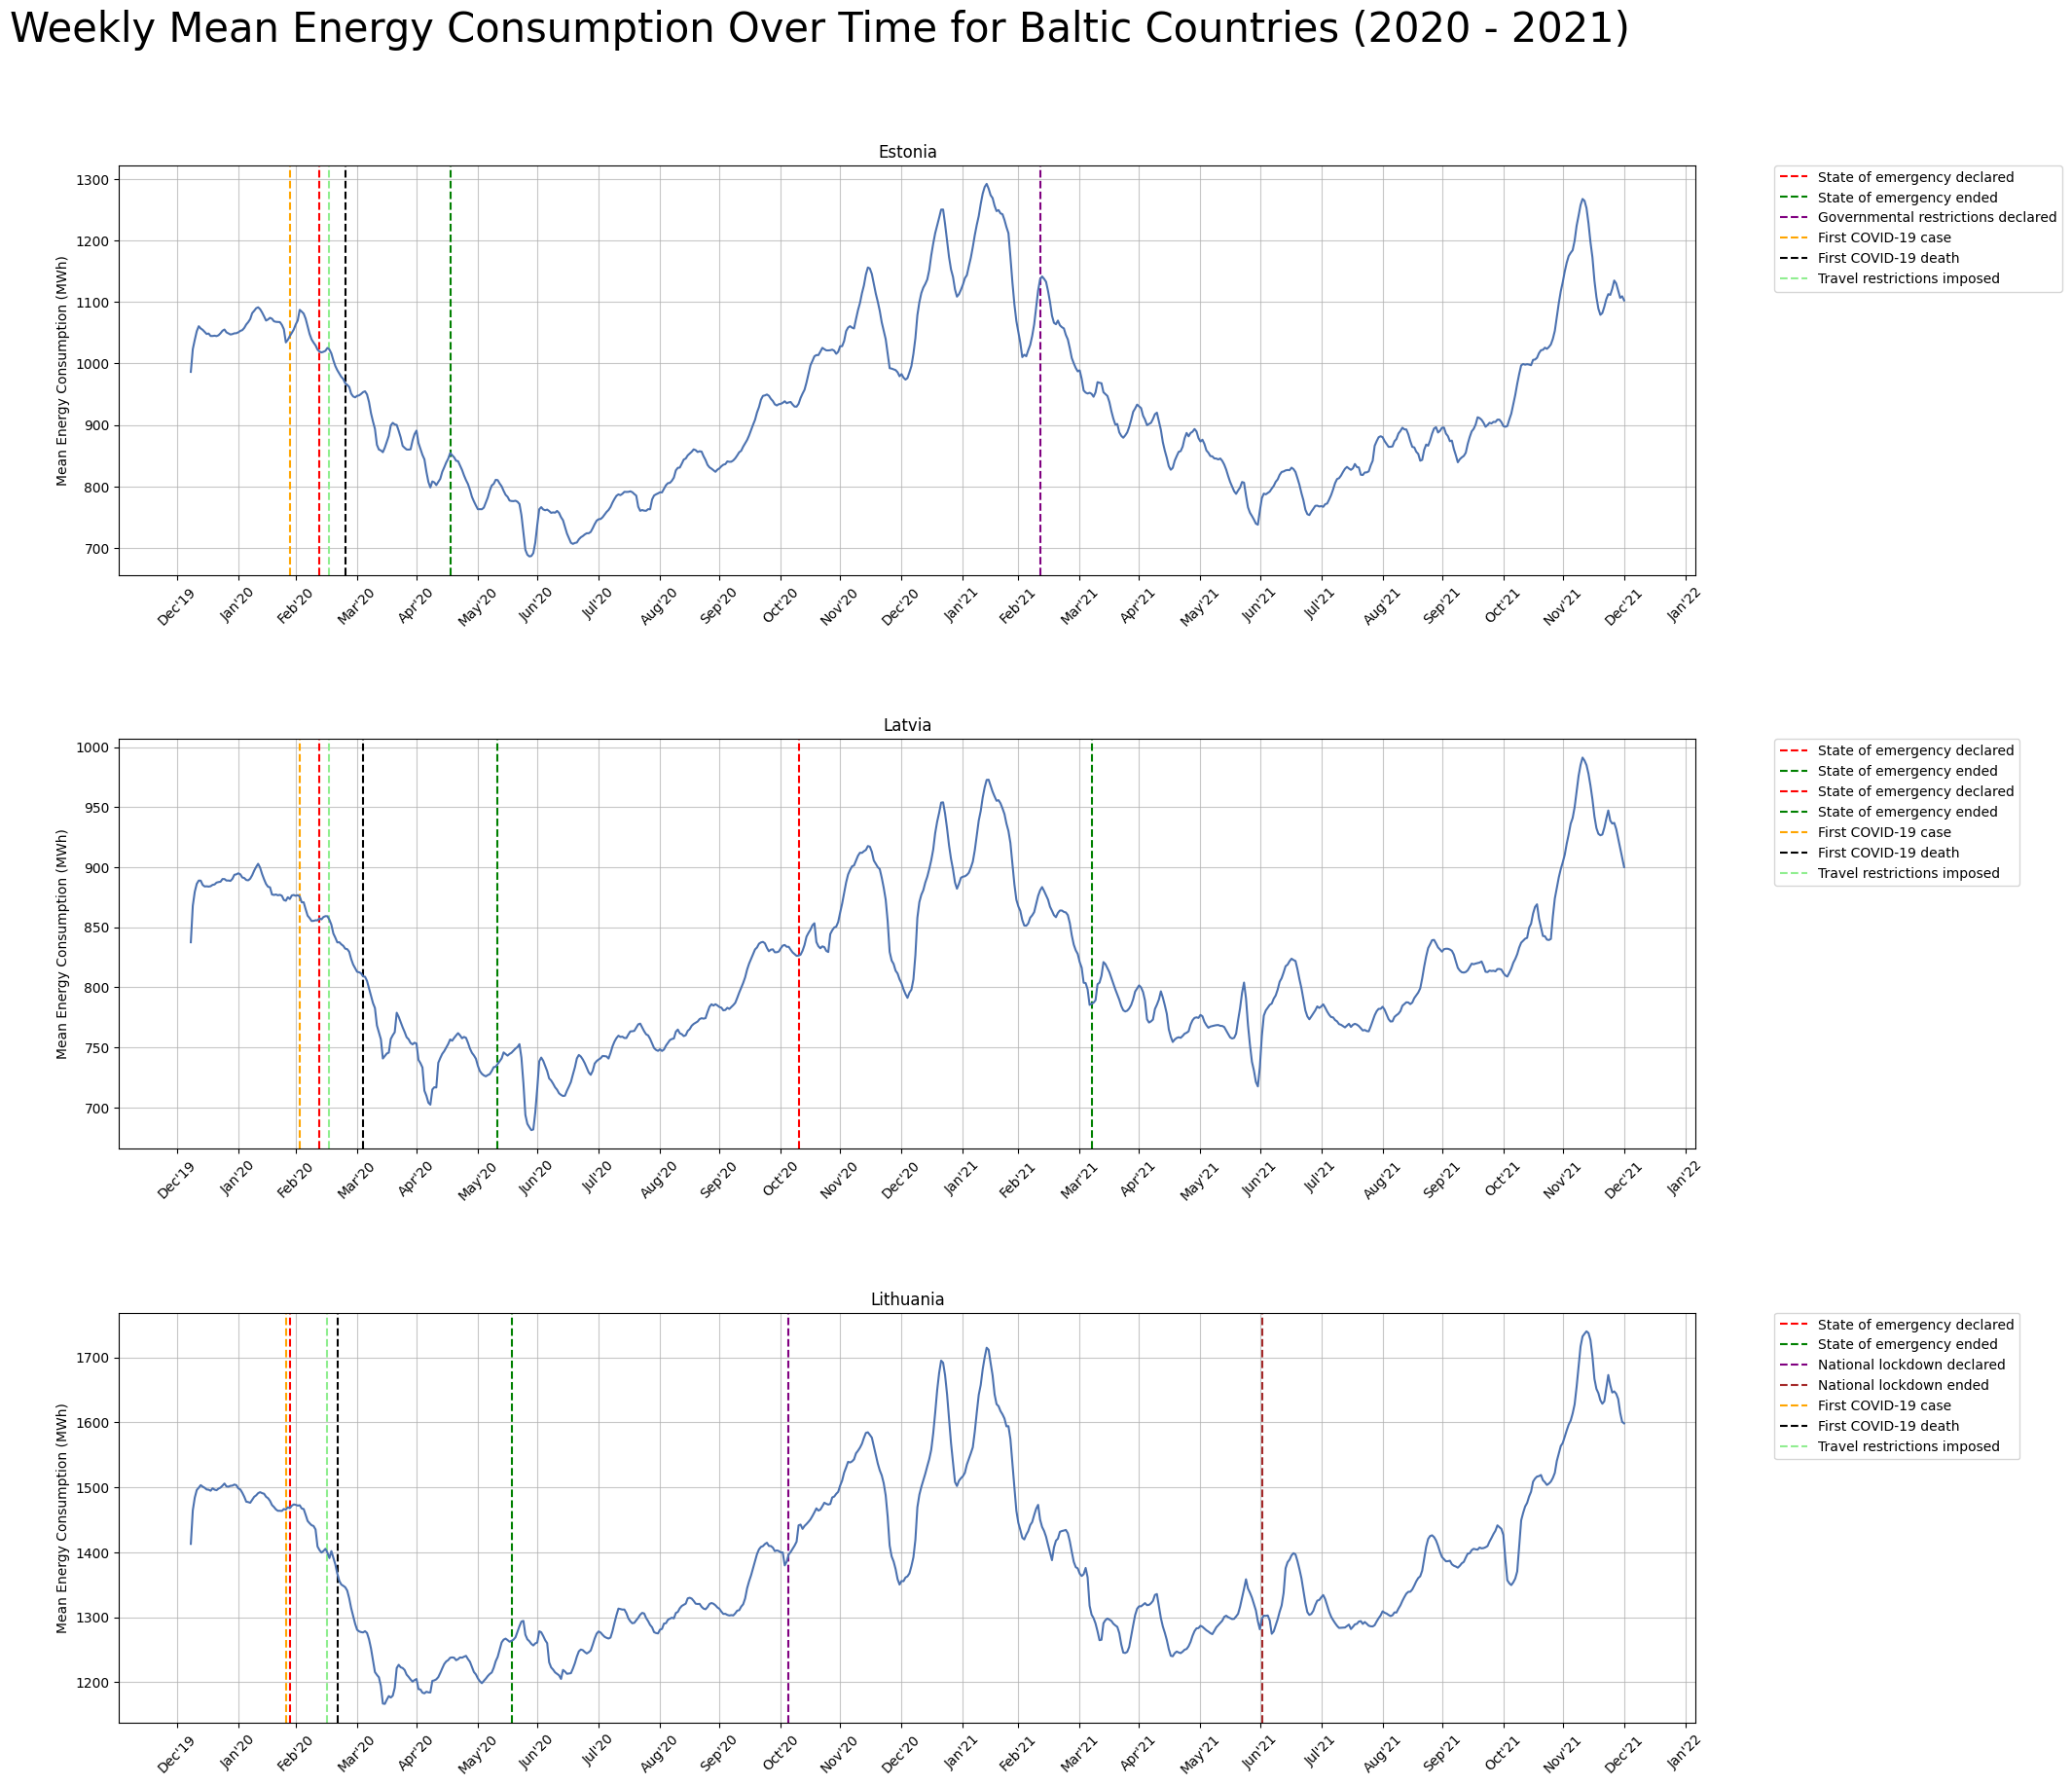

In [7]:
import matplotlib.dates as mdates

# Resetting the index to flatten the multi-index
mean_lv_flat = daily_mean_lv.reset_index()
mean_lt_flat = daily_mean_lt.reset_index()
mean_et_flat = daily_mean_et.reset_index()

# Convert 'Year', 'Month' and 'Day' to datetime
mean_lv_flat['Date'] = pd.to_datetime(mean_lv_flat[['Year', 'Month', 'Day']])
mean_lt_flat['Date'] = pd.to_datetime(mean_lt_flat[['Year', 'Month', 'Day']])
mean_et_flat['Date'] = pd.to_datetime(mean_et_flat[['Year', 'Month', 'Day']])

# Filter data for the year 2020
mean_lv_2020 = mean_lv_flat[(mean_lv_flat['Date'].dt.year == 2020) | (mean_lv_flat['Date'].dt.year == 2021)]
mean_lt_2020 = mean_lt_flat[(mean_lt_flat['Date'].dt.year == 2020) | (mean_lt_flat['Date'].dt.year == 2021)]
mean_et_2020 = mean_et_flat[(mean_et_flat['Date'].dt.year == 2020) | (mean_et_flat['Date'].dt.year == 2021)]

# Create separate plots for each country
fig, axs = plt.subplots(3, 1, figsize=(18, 20))



# Plotting energy consumption for Latvia
axs[1].axvline(pd.to_datetime('2020-03-12'), color='red', linestyle='--', label='State of emergency declared')
axs[1].axvline(pd.to_datetime('2020-06-10'), color='green', linestyle='--', label='State of emergency ended')
axs[1].axvline(pd.to_datetime('2020-11-09'), color='red', linestyle='--', label='State of emergency declared')
axs[1].axvline(pd.to_datetime('2021-04-06'), color='green', linestyle='--', label='State of emergency ended')
axs[1].axvline(pd.to_datetime('2020-03-02'), color='orange', linestyle='--', label='First COVID-19 case')
axs[1].axvline(pd.to_datetime('2020-04-03'), color='black', linestyle='--', label='First COVID-19 death')
axs[1].axvline(pd.to_datetime('2020-03-17'), color='lightgreen', linestyle='--', label='Travel restrictions imposed')

axs[1].plot(mean_lv_2020['Date'], mean_lv_2020['Consumption'].rolling(window=7).mean())  # 7-day rolling average
axs[1].set_ylabel('Mean Energy Consumption (MWh)')
axs[1].set_title('Latvia')

# Set x-ticks to format "mmm'yy"
axs[1].set_xticks(mean_lv_2020['Date'][::4])
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # Ensure ticks at the end of each month
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b\'%y'))  # Format as "mmm'yy"
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-tick labels by 45 degrees
axs[1].grid(True, alpha=0.7)  # Add grid lines

# Plotting energy consumption for Lithuania
axs[2].axvline(pd.to_datetime('2020-02-26'), color='red', linestyle='--', label='State of emergency declared')
axs[2].axvline(pd.to_datetime('2020-06-17'), color='green', linestyle='--', label='State of emergency ended')
axs[2].axvline(pd.to_datetime('2020-11-04'), color='purple', linestyle='--', label='National lockdown declared')
axs[2].axvline(pd.to_datetime('2021-07-01'), color='brown', linestyle='--', label='National lockdown ended')
axs[2].axvline(pd.to_datetime('2020-02-24'), color='orange', linestyle='--', label='First COVID-19 case')
axs[2].axvline(pd.to_datetime('2020-03-21'), color='black', linestyle='--', label='First COVID-19 death')
axs[2].axvline(pd.to_datetime('2020-03-16'), color='lightgreen', linestyle='--', label='Travel restrictions imposed')

axs[2].plot(mean_lt_2020['Date'], mean_lt_2020['Consumption'].rolling(window=7).mean())
axs[2].set_ylabel('Mean Energy Consumption (MWh)')
axs[2].set_title('Lithuania')

# Set x-ticks to format "mmm'yy"
axs[2].set_xticks(mean_lt_2020['Date'][::4])
axs[2].xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # Ensure ticks at the end of each month
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b\'%y'))  # Format as "mmm'yy"
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-tick labels by 45 degrees

axs[2].grid(True, alpha=0.7)  # Add grid lines


# Plotting energy consumption for Estonia
axs[0].axvline(pd.to_datetime('2020-03-12'), color='red', linestyle='--', label='State of emergency declared')
axs[0].axvline(pd.to_datetime('2020-05-17'), color='green', linestyle='--', label='State of emergency ended')
axs[0].axvline(pd.to_datetime('2021-03-11'), color='purple', linestyle='--', label='Governmental restrictions declared')
axs[0].axvline(pd.to_datetime('2020-02-26'), color='orange', linestyle='--', label='First COVID-19 case')
axs[0].axvline(pd.to_datetime('2020-03-25'), color='black', linestyle='--', label='First COVID-19 death')
axs[0].axvline(pd.to_datetime('2020-03-17'), color='lightgreen', linestyle='--', label='Travel restrictions imposed')

axs[0].plot(mean_et_2020['Date'], mean_et_2020['Consumption'].rolling(window=7).mean())
axs[0].set_ylabel('Mean Energy Consumption (MWh)')
axs[0].set_title('Estonia')

# Set x-ticks to format "mmm'yy"
axs[0].set_xticks(mean_et_2020['Date'][::4])
axs[0].xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1))  # Ensure ticks at the end of each month
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b\'%y'))  # Format as "mmm'yy"
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-tick labels by 45 degrees

axs[0].grid(True, alpha=0.7)  # Add grid lines

for ax in axs:
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., frameon=True)

# Adding title
plt.suptitle('Weekly Mean Energy Consumption Over Time for Baltic Countries (2020 - 2021)', fontsize=30)

plt.subplots_adjust(left=0.1, right=1, bottom=0.1, top=0.9, hspace=0.4, wspace=0.2)

plt.savefig('energy_consumption_for_each_country_2020_2021_with_dates_plot.pdf', bbox_inches="tight") 
plt.show()

## Compare each year's energy consumption for each country

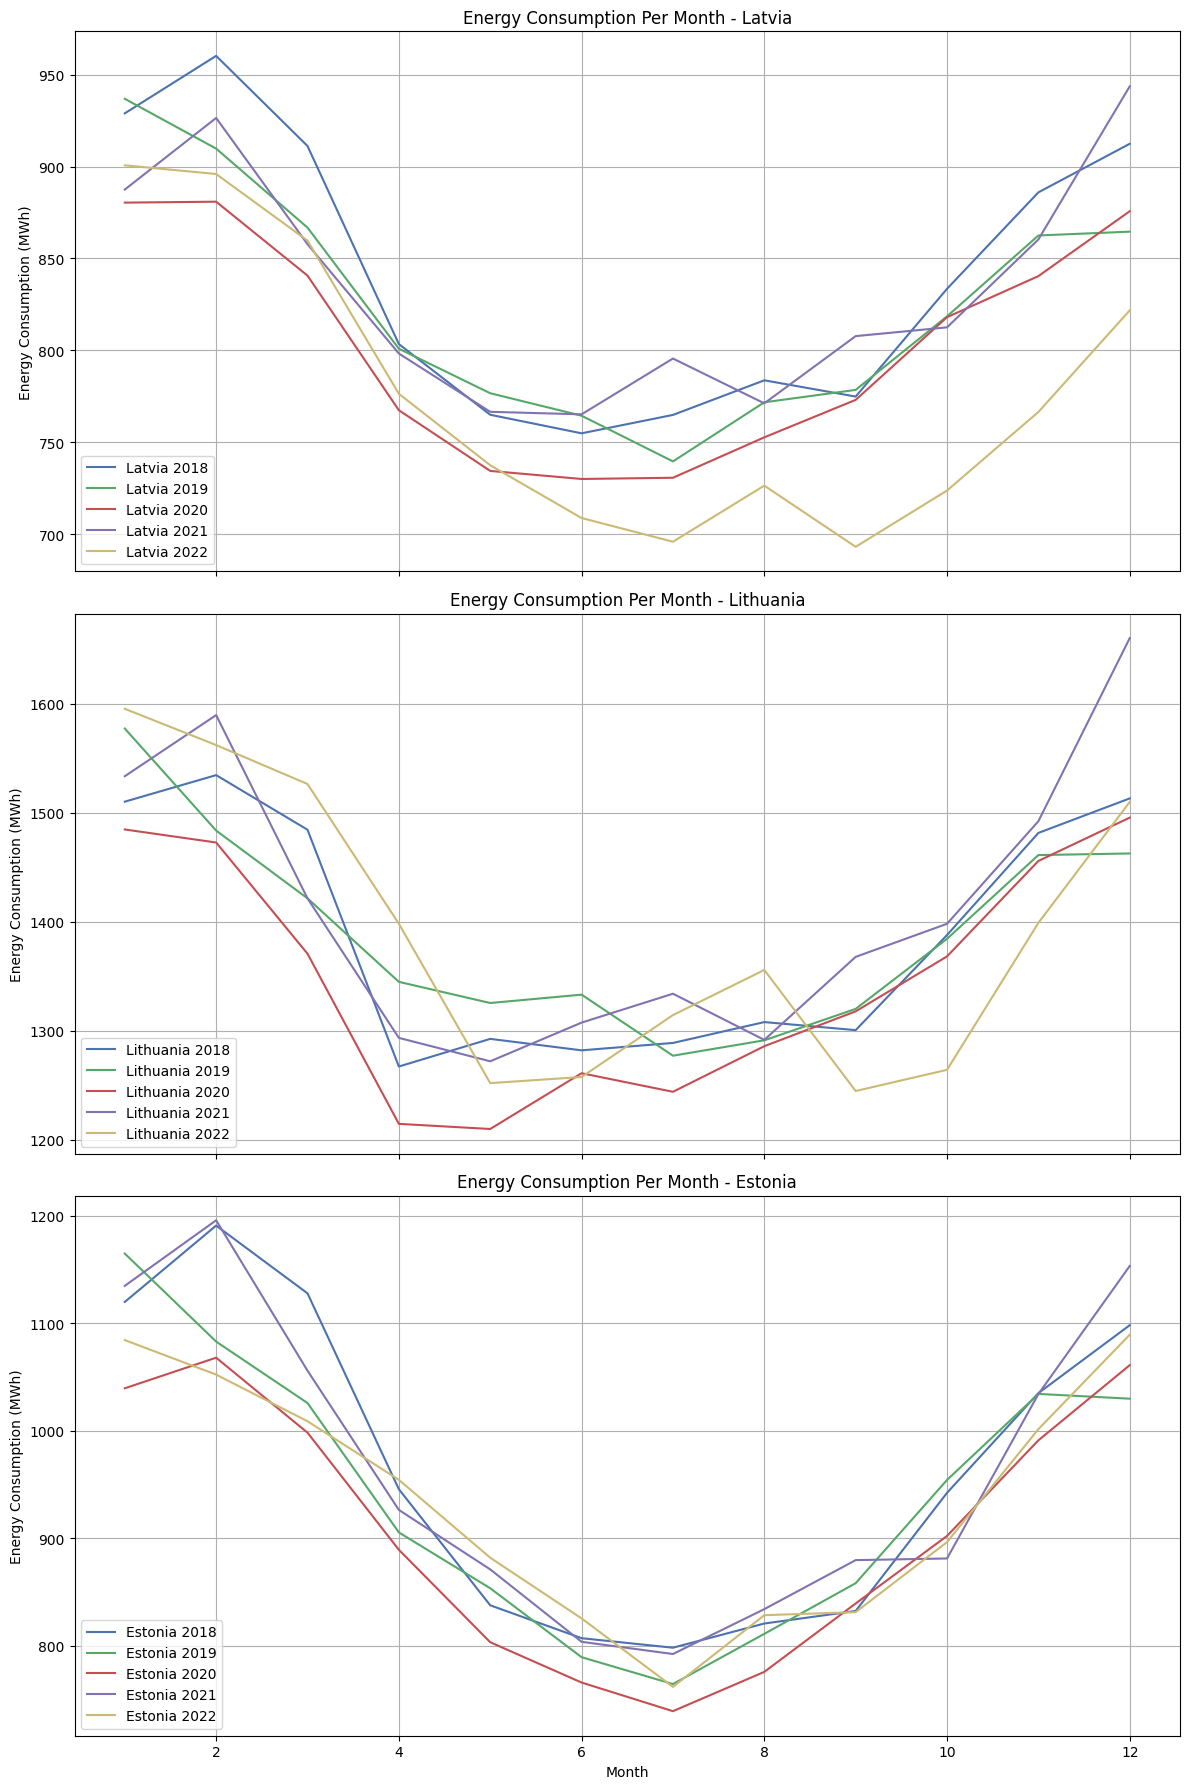

In [8]:
# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Plot for Latvia
for year in mean_lv.index.levels[0]:
    axes[0].plot(mean_lv.loc[year].index.get_level_values('Month'), mean_lv.loc[year], label=f'Latvia {year}')

axes[0].set_title('Energy Consumption Per Month - Latvia')
axes[0].set_ylabel('Energy Consumption (MWh)')
axes[0].legend()
axes[0].grid(True)

# Plot for Lithuania
for year in mean_lt.index.levels[0]:
    axes[1].plot(mean_lt.loc[year].index.get_level_values('Month'), mean_lt.loc[year], label=f'Lithuania {year}')

axes[1].set_title('Energy Consumption Per Month - Lithuania')
axes[1].set_ylabel('Energy Consumption (MWh)')
axes[1].legend()
axes[1].grid(True)

# Plot for Estonia
for year in mean_et.index.levels[0]:
    axes[2].plot(mean_et.loc[year].index.get_level_values('Month'), mean_et.loc[year], label=f'Estonia {year}')

axes[2].set_title('Energy Consumption Per Month - Estonia')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Energy Consumption (MWh)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Mean energy consumption in baltics from 2018-2022 with mean temperature in baltics

In [9]:
temp_lv = pd.read_csv("df_temp_lv.csv")
temp_lt = pd.read_csv("df_temp_lt.csv")
temp_et = pd.read_csv("df_temp_et.csv")

In [10]:
# Merge the DataFrames on the 'date' column
merged_temp = pd.merge(temp_lv, temp_lt, on='date', how='outer', suffixes=('_lv', '_lt'))
merged_temp = pd.merge(merged_temp, temp_et, on='date', how='outer')

# Calculate the mean value for each row
merged_temp['mean_temp'] = merged_temp[['temp_lv', 'temp_lt', 'temp']].mean(axis=1)
# Convert the 'date' column to datetime
merged_temp['date'] = pd.to_datetime(merged_temp['date'])
# Set the 'date' column as the index
merged_temp.set_index('date', inplace=True)
merged_temp

,temp_lv,temp_lt,temp,mean_temp
date,,,,
2018-01-01,3.4,3.3,1.4,2.700000
2018-01-02,2.7,2.8,4.0,3.166667
2018-01-03,2.7,2.1,2.0,2.266667
2018-01-04,3.6,2.7,2.2,2.833333
2018-01-05,4.1,3.3,3.5,3.633333
...,...,...,...,...
2022-12-27,0.8,1.3,-1.5,0.200000
2022-12-28,1.0,0.9,-0.4,0.500000
2022-12-29,1.9,1.1,0.8,1.266667


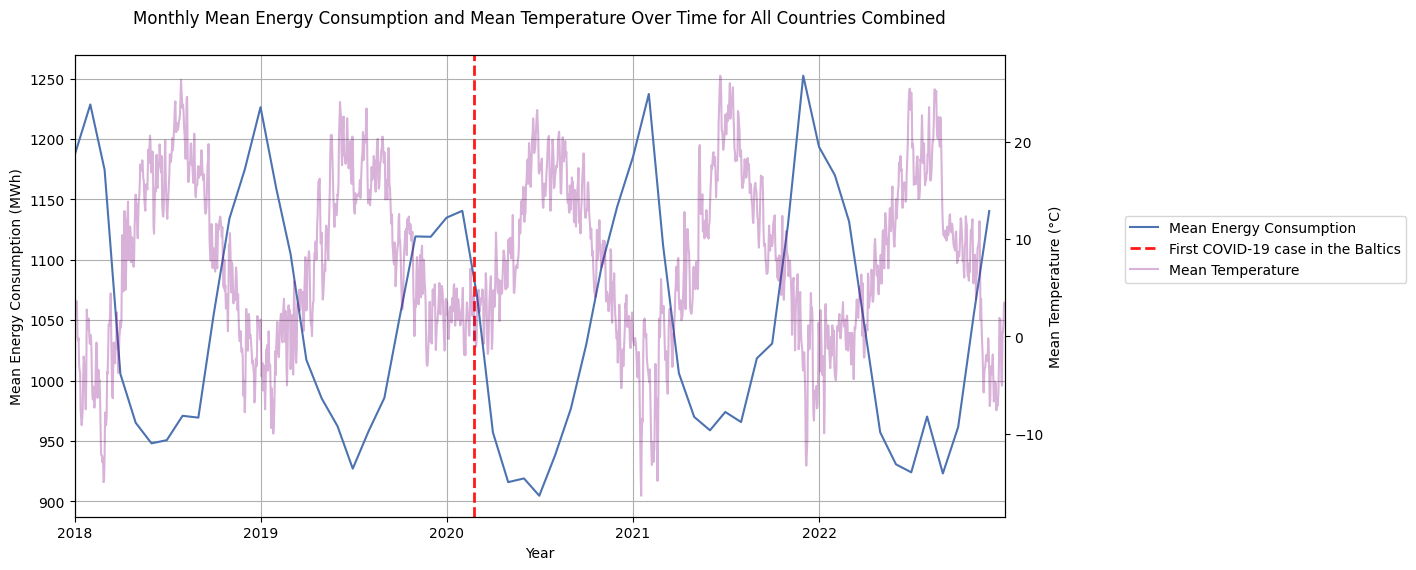

In [11]:
# Combine the data from all three countries
all_countries_combined = pd.concat([mean_lv, mean_lt, mean_et], keys=['Latvia', 'Lithuania', 'Estonia'])

# Calculate the mean energy consumption for all countries combined
mean_all_countries_combined = all_countries_combined.groupby(['Year', 'Month']).mean()

# Convert the index to a DatetimeIndex
mean_all_countries_combined.index = pd.to_datetime(mean_all_countries_combined.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Plotting the mean energy consumption for all countries combined
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting mean energy consumption on the primary y-axis
ax1.plot(mean_all_countries_combined.index, mean_all_countries_combined.values, label='Mean Energy Consumption')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Energy Consumption (MWh)')
ax1.tick_params('y')
ax1.grid(True)

# Creating a secondary y-axis for mean temperature
ax2 = ax1.twinx()
ax2.plot(merged_temp.index, merged_temp['mean_temp'], label='Mean Temperature', color="purple", alpha=0.3)
ax2.set_ylabel('Mean Temperature (°C)')
ax2.tick_params('y')
ax2.grid(False)

# Adding a red line at date 2020-02-24 with label "First COVID-19 case in the Baltics"
emergency_date = pd.to_datetime('2020-02-24')
ax1.axvline(emergency_date, color='red', linestyle='--', label='First COVID-19 case in the Baltics', alpha=0.9, linewidth=2)

# Adding labels and title
plt.title('Monthly Mean Energy Consumption and Mean Temperature Over Time for All Countries Combined', y=1.05)
# fig.tight_layout(rect=[0, 0, 1, 1])

# Display the legend
fig.legend(loc='lower left', bbox_to_anchor=(1, 0.5), borderaxespad=0., frameon=True)

# Set x-axis limits
plt.xlim([merged_temp.index.min(), merged_temp.index.max()])

# Set x-axis ticks to years
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.savefig('energy_consumption_baltics_with_temperature_plot.pdf', bbox_inches="tight") 
plt.show()

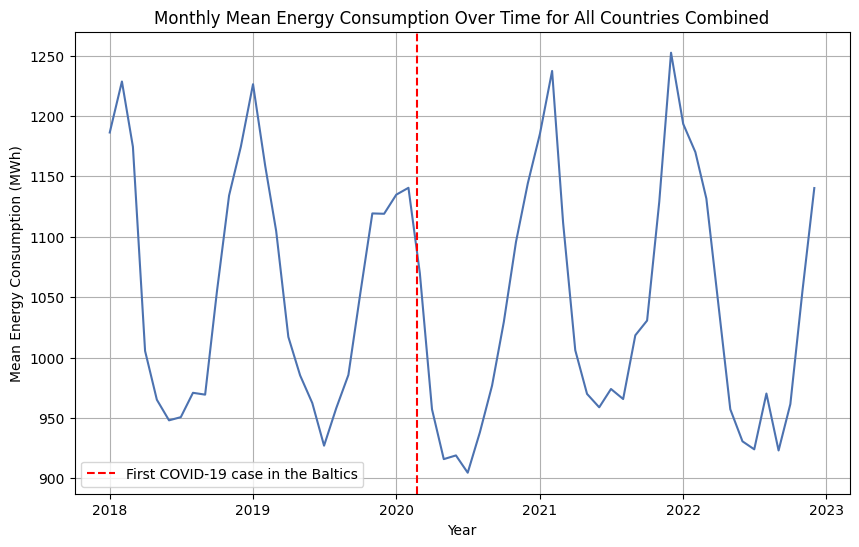

In [12]:
# Combine the data from all three countries
all_countries_combined = pd.concat([mean_lv, mean_lt, mean_et], keys=['Latvia', 'Lithuania', 'Estonia'])

# Calculate the mean energy consumption for all countries combined
mean_all_countries_combined = all_countries_combined.groupby(['Year', 'Month']).mean()

# Convert the index to a DatetimeIndex
mean_all_countries_combined.index = pd.to_datetime(mean_all_countries_combined.index.map(lambda x: f'{x[0]}-{x[1]}'))

# Plotting the mean energy consumption for all countries combined
plt.figure(figsize=(10, 6))
plt.plot(mean_all_countries_combined.index, mean_all_countries_combined.values)

# Adding a red line at date 2020-03-13 with label "State of emergency declared"
emergency_date = pd.to_datetime('2020-02-24')
plt.axvline(emergency_date, color='red', linestyle='--', label='First COVID-19 case in the Baltics')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Energy Consumption (MWh)')
plt.title('Monthly Mean Energy Consumption Over Time for All Countries Combined')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()